In [1]:
import pandas as pd
from plotnine import *

In [24]:
df = pd.read_csv('data/data_TV.csv')

In [25]:
df.shape

(2617, 8)

In [26]:
df.head(2)

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac..."


In [27]:
df = df.drop(columns=(["name", "overview"]))

In [28]:
df.isnull().sum()

first_air_date       6
origin_country       0
original_language    0
popularity           0
vote_average         0
vote_count           0
dtype: int64

In [29]:
df['first_air_date'] = df['first_air_date'].fillna(df['first_air_date'].mode()[0])

In [30]:
df.isnull().sum()

first_air_date       0
origin_country       0
original_language    0
popularity           0
vote_average         0
vote_count           0
dtype: int64

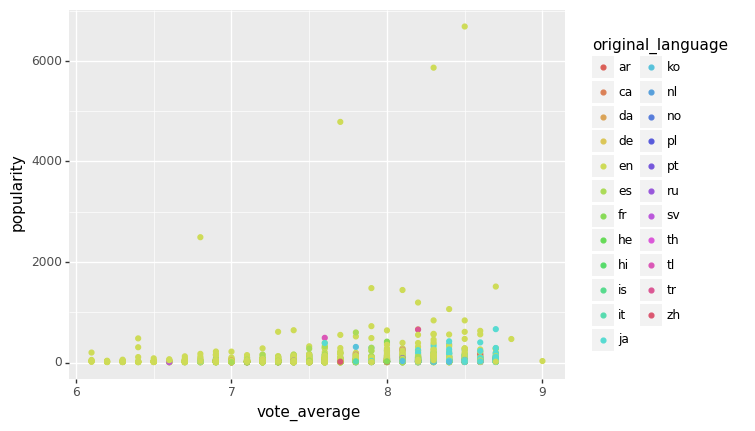

<ggplot: (146957861965)>

In [54]:
ggplot(data=df[df['vote_average'] > 6], mapping=aes('vote_average', 'popularity', color='original_language')) +\
geom_point()

In [120]:
df2 = df.groupby(['origin_country']).mean().head(20).reset_index()

C:\Users\rsoko\AppData\Local\Temp\ipykernel_17132\3121409073.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [121]:
df2

,origin_country,popularity,vote_average,vote_count
0,AR,90.151636,7.927273,396.818182
1,AT,19.522000,7.200000,148.000000
2,AU,29.161625,7.525000,258.750000
3,BE,23.753667,6.900000,228.000000
4,BR,27.057900,7.570000,306.250000
5,CA,40.002385,7.274359,492.102564
6,CL,25.670333,7.666667,420.333333
7,CN,39.937300,8.030000,288.400000
8,CO,59.313491,7.625455,490.818182
9,DE,35.591364,7.509091,758.454545


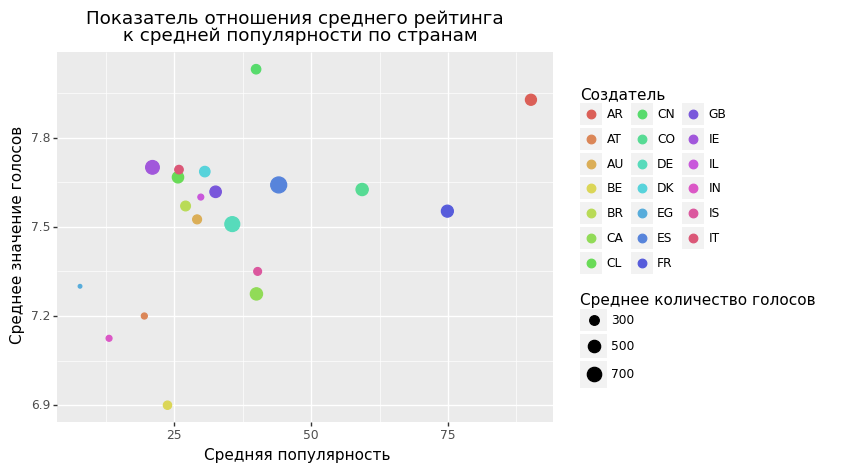

<ggplot: (146963445273)>

In [128]:
ggplot(data=df2[df2['vote_average'] > 6], mapping=aes('popularity', 'vote_average', color='origin_country', size='vote_count')) +\
geom_point() +\
theme(legend_position="right") +\
guides(colour=guide_legend(ncol=3, override_aes={"size": 3})) +\
labs(y="Среднее значение голосов",
         x="Средняя популярность",
         colour="Создатель",
         size='Среднее количество голосов',
         title="Показатель отношения среднего рейтинга \n к средней популярности по странам")